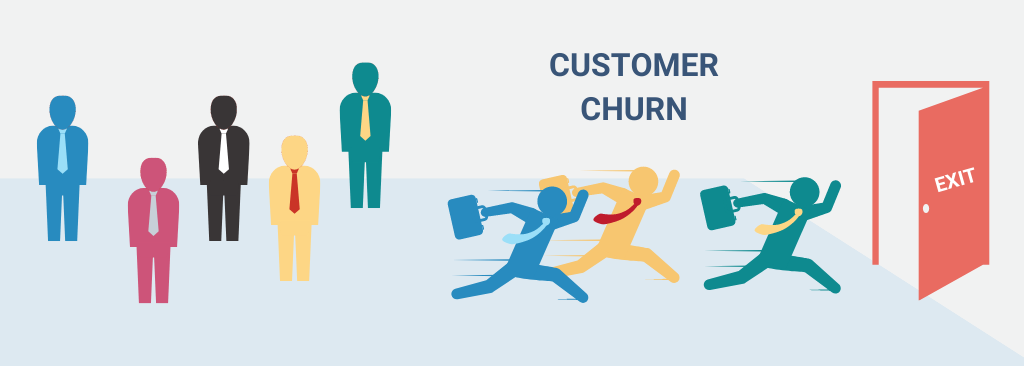

## Business Problem

#### Telecommunications industry experiences an average of 15-25% annual churn rate.
#### It costs 5-10 times more to acquire a new customer than to retain an existing one 
#### Customer retention has now become even more important than customer acquisition.

## Business Goal

#### Retaining high profitable customers.
#### Predict which customers are at high risk of churn.

## Steps:-
### Importing data &Data preparation
##### Filtering high value customers
##### Dropping features with no variance
##### Deriving new features
##### Labelling churned status
##### Missing values treatment
##### Outlier treatment
##### Checking correlation
##### Bivariate Analysis
##### Multivariate Analysis
##### Data split into train & test
##### Feature scaling
##### Data imbalance treatement

### Model building
##### Build Logistic regression model
##### Build Decission tree model


## Importing important libraries, data & data preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Model Building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('telecom_churn_data (1).csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Handling missing values in columns

In [7]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [8]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [9]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [10]:
df.shape

(99999, 186)

## Deleting the columns which are not required in our analysis

In [11]:
## Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [12]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [13]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [14]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

In [15]:
df.shape

(99999, 177)

## Filter high-value customers

In [16]:
##Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [17]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [18]:
# Finding the 70th percentile of the avg_rech_amt_6_7

In [19]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [20]:
# Filter the customers, who have recharged more than or equal to X.

In [21]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [22]:
df.shape

(30011, 178)

## Handling missing values in rows

In [23]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [24]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [25]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


### Checking the records for the MOU for Sep(9), in which these coulmns have missing values

In [26]:
# Listing the columns of MOU Sep(9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [27]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [28]:
df_null_mou_9.shape

(1590, 178)

In [29]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [30]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


## Checking the records for the MOU for Aug(8), in which these coulmns have missing values

In [31]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [32]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [33]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [34]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


## Checking the records for the MOU for Jul(7), in which these coulmns have missing values 

In [35]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

[]


In [36]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.00,0.00,163.39,778.0
9021,7000563525,0.0,0.0,0.0,266.914,722.042,1078.905,247.032,NaN,NaN,...,0,0,0,0,517,3011.40,458.66,729.82,0.00,503.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.00,0.00,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.00,0.00,0.00,692.5
10274,7000019836,0.0,0.0,0.0,428.933,693.332,351.477,622.228,NaN,NaN,...,0,0,0,0,189,174.71,0.00,0.00,17.69,662.0


In [37]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [38]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_og_t2m_mou_6,0.41
loc_og_mou_6,0.41
loc_og_t2t_mou_6,0.41
loc_ic_t2t_mou_6,0.41
spl_ic_mou_6,0.41
...,...
isd_og_mou_9,0.00
spl_og_mou_7,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00


## Checking the records for the MOU for Jun(6), in which these coulmns have missing values

In [39]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

[]


In [40]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [41]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [42]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


### No more missing values reflecting

## Tagging Churners

#### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [43]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [44]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


### Deleting all the attributes corresponding to the churn phase

In [45]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [46]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [47]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

### Checking churn percentage

In [48]:
round(100*(df['churn'].mean()),2)

3.39

In [49]:
# Class imbalance can be taken care later as there is very little percentage of churn rate

## Outliers treatment

In [50]:
# In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [51]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [53]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


### Removing outliers below 10th and above 90th percentile

In [54]:
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

## Derive new features

In [55]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Deriving new column decrease_mou_action

In [56]:
# This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [57]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [58]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [59]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [60]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [61]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


### Deriving new column decrease_rech_num_action

In [62]:
# This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [63]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [64]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [65]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [66]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


### Deriving new column decrease_rech_amt_action

In [67]:
# This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [68]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [69]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [70]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [71]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


### Deriving new column decrease_arpu_action

In [72]:
# This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [73]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [74]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [75]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [76]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


### Deriving new column decrease_vbc_action

In [77]:
# This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [78]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [79]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [80]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [81]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


# EDA

### Univariate analysis

In [82]:
# Churn rate on the basis whether the customer decreased her/his MOU in action month

In [83]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

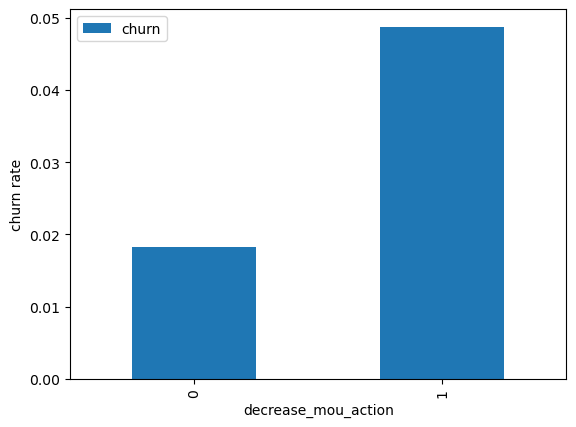

In [84]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation

In [85]:
# It can be noticed that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

In [86]:
# Churn rate on the basis whether the customer decreased her/his number of recharge in action month

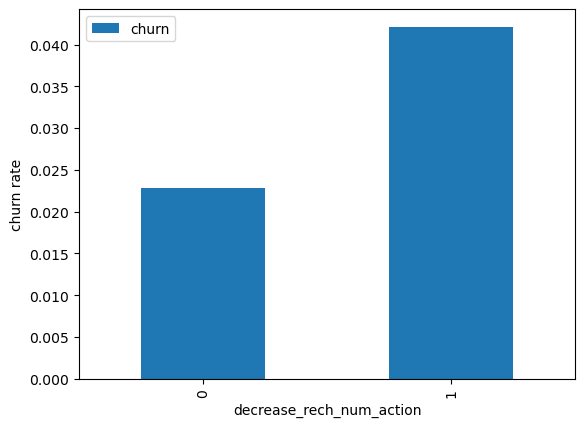

In [87]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation

In [88]:
# seems churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

In [89]:
# Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

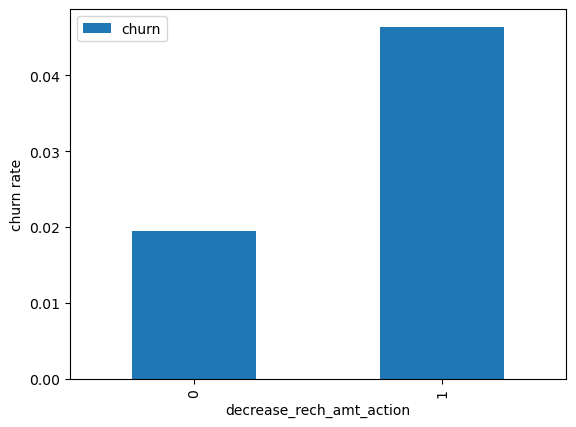

In [90]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation

In [91]:
# The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

In [92]:
# Churn rate on the basis whether the customer decreased her/his volume based cost in action month

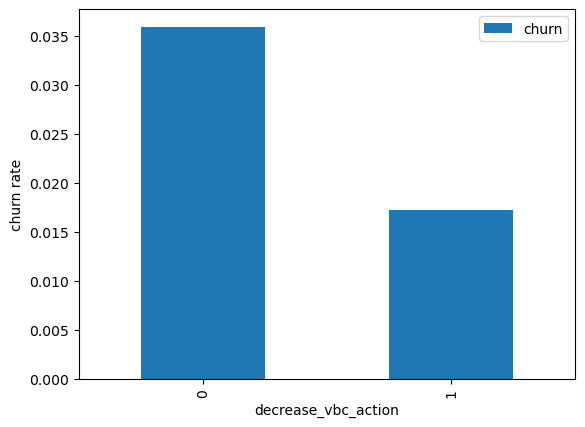

In [93]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation

In [94]:
# The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

In [95]:
# Analysis of the average revenue per customer (churn and not churn) in the action phase

In [96]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

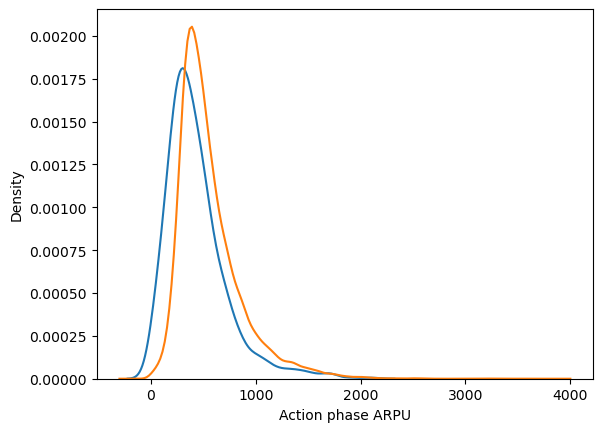

In [97]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

In [98]:
# Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

# ARPU for the not churned customers is mostly densed on the 0 to 1000.


In [99]:
# Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

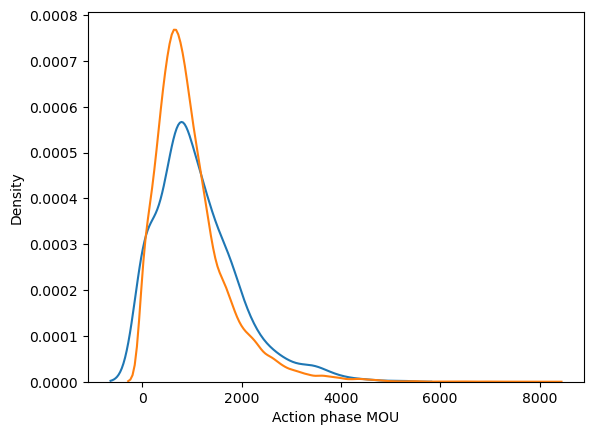

In [100]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

##### Observation

In [101]:
# Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

In [102]:
# Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

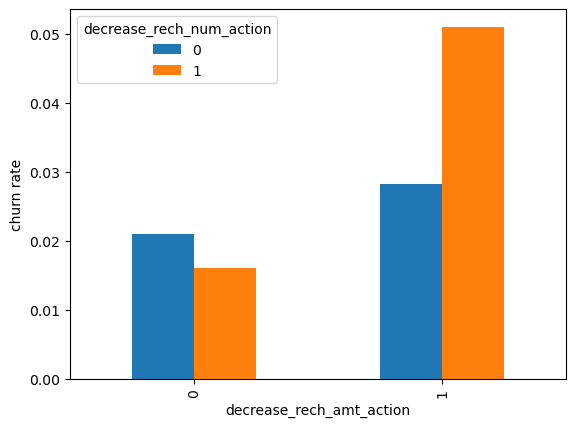

In [103]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation

In [104]:
# The churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

In [105]:
# Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

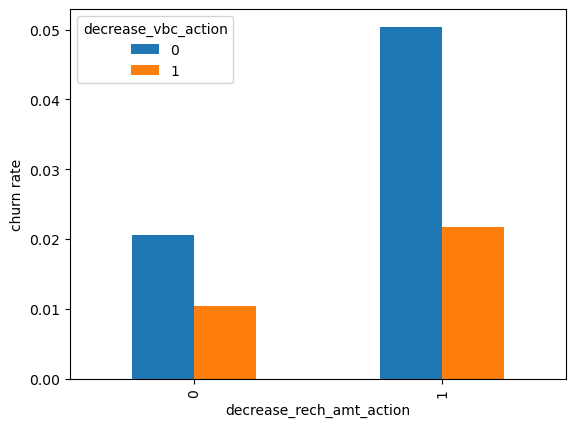

In [106]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation

In [107]:
# It can be seen that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [108]:
# Analysis of recharge amount and number of recharge in action month

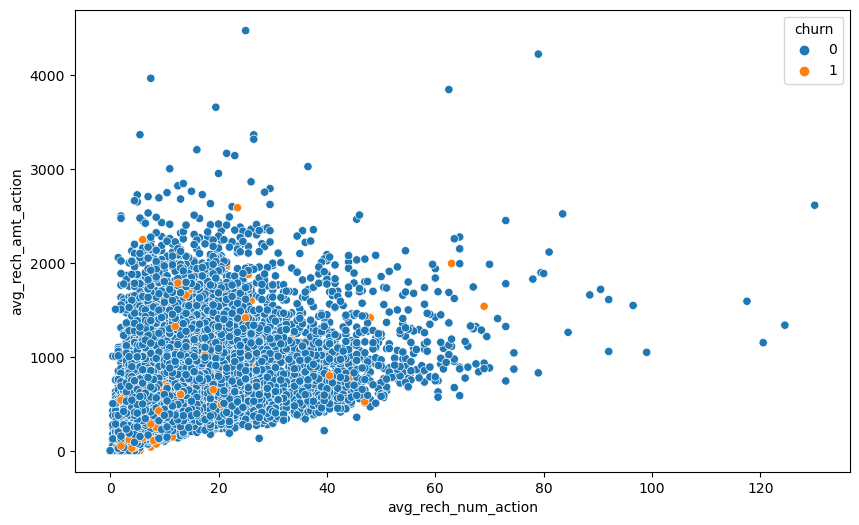

In [109]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='avg_rech_num_action',y='avg_rech_amt_action', hue='churn', data=data)

##### Observation

In [110]:
# The recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [111]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

# Train-Test Split

In [112]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [113]:
# Putting target variable to y
y = data['churn']

In [114]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [115]:
!pip install imblearn

Unable to create process using 'C:\Users\Megha Bose\anaconda3\python.exe "C:\Users\Megha Bose\anaconda3\Scripts\pip-script.py" install imblearn'


### Dealing with data imbalance

In [116]:
# Create synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [117]:
from imblearn import under_sampling, over_sampling

In [118]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [119]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [120]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [121]:
# Instantiate the Scaler
scaler = StandardScaler()

In [122]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [123]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [124]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,...,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,...,-0.113882,-0.790173,-0.255884,-0.265392,-0.259366,0,0,0,0,0
2,0.0,0.0,0.0,-0.222751,0.543206,0.809117,-0.601239,-0.599206,-0.331043,-0.363395,...,2.526725,1.571302,3.307334,2.691063,1.700218,1,0,0,0,0
3,0.0,0.0,0.0,-0.911173,0.842273,0.731302,-0.702232,-0.650471,-0.458464,-0.789784,...,-0.113882,-0.951024,-0.255884,-0.265392,-0.259366,0,0,0,0,0
4,0.0,0.0,0.0,0.271356,0.247684,1.256421,-0.356392,-0.180394,0.114727,0.899204,...,-0.113882,-0.519757,-0.255884,-0.265392,-0.259366,0,0,0,0,0


#### Transform the test set

In [125]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,...,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,...,-0.113882,0.622516,2.423668,2.357564,5.861151,1,1,1,1,1
39613,0.0,0.0,0.0,0.545470,0.184388,1.403349,-0.537110,-0.521615,-0.206890,0.694901,...,-0.113882,2.966507,-0.255884,-0.265392,-0.259366,1,1,1,0,0
93118,0.0,0.0,0.0,0.641508,0.816632,-0.211023,-0.058843,0.029897,-0.155872,-0.148197,...,-0.113882,1.742643,-0.255884,-0.265392,-0.259366,1,0,1,1,0
81235,0.0,0.0,0.0,3.878627,0.911619,2.745295,4.117829,1.452446,2.809582,-0.002634,...,1.206422,-0.244679,-0.255884,-0.265392,-0.259366,1,1,1,1,0


## Model with PCA

In [126]:
#Import PCA
from sklearn.decomposition import PCA

In [127]:
# Instantiate PCA
pca = PCA(random_state=42)

In [128]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [129]:
# Principal components
pca.components_

array([[-7.50315936e-20,  5.55111512e-17,  1.11022302e-16, ...,
        -2.59799614e-02, -2.57740516e-02,  1.40032998e-02],
       [-1.61507486e-19,  5.55111512e-17,  0.00000000e+00, ...,
        -1.16737642e-02, -9.94022864e-03, -1.42598315e-02],
       [ 1.91332162e-19,  5.55111512e-17,  8.32667268e-17, ...,
        -4.18532955e-02, -4.28357226e-02,  2.46812846e-02],
       ...,
       [ 0.00000000e+00, -5.53430888e-02,  4.57536238e-02, ...,
         8.58688121e-17, -1.20563282e-16,  8.67361738e-19],
       [-0.00000000e+00, -1.80347530e-03,  5.22507225e-03, ...,
        -9.54097912e-17, -6.21247845e-17, -2.59666420e-17],
       [ 9.99999516e-01, -8.04664268e-04, -5.60498582e-04, ...,
         2.10064171e-19,  4.20128342e-19, -1.91090633e-17]])

In [130]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11213256 0.19426234 0.24575583 0.28953571 0.32841891 0.36623473
 0.40173361 0.43144425 0.45702167 0.48194328 0.50480575 0.52673812
 0.54724457 0.5670202  0.58530008 0.60304258 0.6190213  0.63473458
 0.64927873 0.66341423 0.67712828 0.69025011 0.7020618  0.71278516
 0.72309435 0.73290234 0.74255604 0.75209676 0.76151565 0.77010093
 0.77861315 0.7866115  0.79429496 0.80173555 0.80878909 0.81538157
 0.82193734 0.8283476  0.83472622 0.84089758 0.84687761 0.85280024
 0.85840083 0.86374029 0.86901646 0.87418749 0.87891437 0.88341796
 0.887723   0.89186057 0.89588256 0.89966074 0.90339384 0.90704071
 0.91060084 0.91411689 0.91752343 0.92076319 0.92395413 0.92705111
 0.93001239 0.93296077 0.93580029 0.93862291 0.94138851 0.9441162
 0.94678675 0.94937767 0.95188405 0.95433786 0.95665036 0.95893735
 0.96116409 0.96323063 0.96526039 0.967203   0.96912626 0.97100138
 0.97284931 0.9746657  0.97639261 0.97806622 0.97972617 0.98133794
 0.98290963 0.98446566 0.98601222 0.98753485 0.98877905 0.98998

Text(0, 0.5, 'Cumulative Variance')

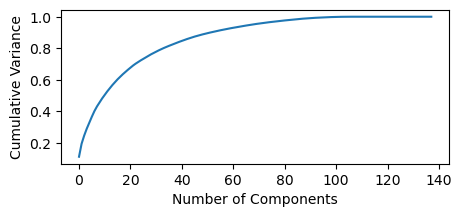

In [131]:
# Plotting scree plot
fig = plt.figure(figsize = (5,2))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [132]:
# 60 components explain almost more than 90% variance of the data. So, we will perform PCA with 60 components.

### Performing PCA with 60 components

In [133]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [134]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [135]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [136]:
#Fitting is already done on the train set
#have to do the transformation with the already fitted data on the train set.

In [137]:
X_test_pca = pca_final.transform(X_test)

### Logistic regression with PCA

In [138]:
# Tuning hyperparameter C

In [139]:
# C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [140]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [141]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [142]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.323535,0.033300,0.007246,0.007078,0.01,{'C': 0.01},0.900071,0.897759,0.895814,0.906425,...,0.897524,0.006134,5,0.901116,0.898256,0.899387,0.895440,0.897971,0.898434,0.001861
1,0.524877,0.015930,0.009371,0.007652,0.1,{'C': 0.1},0.898177,0.896359,0.894651,0.905959,...,0.896910,0.005390,6,0.901174,0.898431,0.899270,0.896725,0.899257,0.898971,0.001440
2,0.524878,0.007655,0.000000,0.000000,1,{'C': 1},0.898650,0.898693,0.895581,0.905028,...,0.897656,0.004783,4,0.901988,0.898606,0.898861,0.898184,0.899199,0.899368,0.001351
3,0.512462,0.006290,0.009372,0.007652,10,{'C': 10},0.898887,0.898459,0.896744,0.904562,...,0.897704,0.004719,3,0.902511,0.898956,0.898394,0.898476,0.899550,0.899577,0.001524
4,0.546748,0.022093,0.012495,0.006248,100,{'C': 100},0.899597,0.898226,0.896977,0.904330,...,0.897892,0.004528,1,0.902628,0.898722,0.898569,0.898593,0.899725,0.899648,0.001550
5,0.541064,0.009121,0.003202,0.006212,1000,{'C': 1000},0.899597,0.898226,0.896977,0.904330,...,0.897892,0.004528,1,0.902628,0.898839,0.898686,0.898593,0.899608,0.899671,0.001521


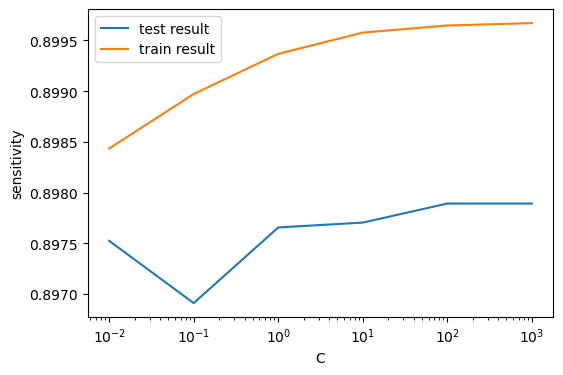

In [143]:
# plot of C versus train and validation scores

plt.figure(figsize=(6, 4))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [144]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8978916608693863 at C = 100


### Logistic regression with optimal C

In [145]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [146]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Prediction on train set

In [147]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [148]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17908  3517]
 [ 2154 19271]]


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8676546091015169
Sensitivity:- 0.899463243873979
Specificity:- 0.8358459743290548


#### Prediction on the test set

In [151]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [152]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4452  896]
 [  36  157]]


In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8317993142032124
Sensitivity:- 0.8134715025906736
Specificity:- 0.8324607329842932


#### Summary of model

In [155]:
#Train set
        #Accuracy = 0.86
        #Sensitivity = 0.89
        #Specificity = 0.83
#Test set
        #Accuracy = 0.83
        #Sensitivity = 0.81
        #Specificity = 0.83

#Overall, the model is performing well in the test set, what it had learnt from the train set.

### Support Vector Machine(SVM) with PCA

# Importing SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Hyperparameter tuning

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [156]:
# Plotting the accuracy with various C and gamma values

##### Build the model with optimal hyperparameters

#### Prediction on the train set

#### Prediction on the test set

#### Summary of the model

## Decision tree with PCA

In [157]:
# Hyperparameter tuning

In [158]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [159]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.374304,0.016433,0.006248,0.007652,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
1,1.390299,0.009890,0.006255,0.007661,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
2,1.451898,0.095160,0.006249,0.007654,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849475,0.861564,0.009567,7
3,1.387173,0.011690,0.003124,0.006248,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849475,0.861564,0.009567,7
4,2.383814,0.021190,0.006249,0.007654,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
5,2.336957,0.018741,0.006249,0.007653,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
6,2.252588,0.030297,0.012498,0.006249,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.869778,0.875613,0.891949,0.883781,0.882147,0.008369,4
7,2.439355,0.222374,0.005400,0.006076,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.871179,0.875613,0.891949,0.883781,0.882427,0.007964,3


In [160]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9004900816802801
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [161]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Prediction on the train set

In [162]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [163]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18913  2512]
 [ 1763 19662]]


In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9002333722287048
Sensitivity:- 0.9177129521586931
Specificity:- 0.8827537922987164


#### Prediction on the test set

In [166]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [167]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4632  716]
 [  58  135]]


In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8603140227395777
Sensitivity:- 0.6994818652849741
Specificity:- 0.8661181750186986


#### Summary of the model

In [170]:
#Train set
        #Accuracy = 0.90
        #Sensitivity = 0.91
        #Specificity = 0.88
#Test set
        #Accuracy = 0.86
        #Sensitivity = 0.70
        #Specificity = 0.87

##### Observation

In [171]:
# The accuracy and specificity is quite good in the test set.

### Random forest with PCA

In [174]:
# Hyperparameter tuning

In [175]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [176]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8440840497769813 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [177]:
# Model with optimal hyperparameters

In [178]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [179]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Prediction on the train set

In [180]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [181]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17358  4067]
 [ 2486 18939]]


In [182]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [183]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.847071178529755
Sensitivity:- 0.8839673278879814
Specificity:- 0.8101750291715286


#### Prediction on the test set

In [184]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [185]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4294 1054]
 [  48  145]]


In [186]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [187]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8011189316007941
Sensitivity:- 0.7512953367875648
Specificity:- 0.8029169783096485


In [188]:
#### Summary of the model

In [189]:
#Train set
        #Accuracy = 0.84
        #Sensitivity = 0.88
        #Specificity = 0.80
#Test set
        #Accuracy = 0.80
        #Sensitivity = 0.75
        #Specificity = 0.80

## Without PCA

#### Logistic regression with No PCA

In [190]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [191]:
pip install statsmodels

In [192]:
import statsmodels.api as sm

In [193]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [194]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [195]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Aug 2023   Deviance:                       23572.
Time:                        20:03:25   Pearson chi2:                 3.70e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -57.0302   4421.369     -0.013      0.990   -8722.754    8608.693
loc_og_t2o_mou            9.816e-07   9.48e-05      0.010      0.992      -0.000       0.000
std_og_t2o_mou           -2.411e-06      0.000     -0.011      0.991      -0.000       0.000
loc_ic_t2o_mou           -1.103e-06   7.55e-05     -0.015      0.988      -0.000       0.000
arpu_6                      -0.0339      0.081     -0.421      0.674      -0.192       0.124
arpu_7                       0.0855      0.086      0.995      0.320      -0.083       0.254
arpu_8                       0.0909      0.110      0.829      0.407      -0.124       0.306
onnet_mou_6                 15.5099      3.568      4.346      0.000       8.516      22.504
onnet_mou_7                 -4.3247      1.803     -2.398      0.016      -7.859      -0.790
onnet_mou_8                  2.3536      1.821      1.293      0.196      -1.215       5.923
offnet_mou_6                15.0837      3.357      4.493      0.000       8.504      21.663
offnet_mou_7                -1.7632      1.708     -1.032      0.302      -5.111       1.585
offnet_mou_8                -0.5483      1.878     -0.292      0.770      -4.230       3.133
roam_ic_mou_6                0.1621      0.036      4.553      0.000       0.092       0.232
roam_ic_mou_7               -0.0098      0.052     -0.189      0.850      -0.111       0.092
roam_ic_mou_8                0.2041      0.044      4.686      0.000       0.119       0.289
roam_og_mou_6               -5.1495      1.129     -4.559      0.000      -7.363      -2.936
roam_og_mou_7                0.8855      0.471      1.881      0.060      -0.037       1.808
roam_og_mou_8                0.0924      0.530      0.175      0.861      -0.945       1.130
loc_og_t2t_mou_6         -3302.4580    655.926     -5.035      0.000   -4588.050   -2016.866
loc_og_t2t_mou_7         -1474.8728    679.378     -2.171      0.030   -2806.430    -143.316
loc_og_t2t_mou_8          5515.7248    628.116      8.781      0.000    4284.640    6746.810
loc_og_t2m_mou_6         -3342.0747    663.675     -5.036      0.000   -4642.854   -2041.295
loc_og_t2m_mou_7         -1392.3484    640.722     -2.173      0.030   -2648.141    -136.556
loc_og_t2m_mou_8          5886.9555    670.224      8.784      0.000    4573.342    7200.569
loc_og_t2f_mou_6          -285.1930     56.671     -5.032      0.000    -396.265    -174.121
loc_og_t2f_mou_7          -123.0378     56.643     -2.172      0.030    -234.056     -12.020
loc_og_t2f_mou_8           487.3637     55.515      8.779      0.000     378.557     596.171
loc_og_t2c_mou_6             0.0432      0.022      2.004      0.045       0.001       0.085
loc_og_t2c_mou_7             0.0099      0.021      0.465      0.642      -0.032       0.052
loc_og_t2c_mou

## Feature Selection Using RFE

In [196]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [197]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg)
#rfe = RFE(logreg,n_fea15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [198]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_8',
       'og_others_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'last_day_rch_amt_6', 'last_day_rch_amt_8',
       'vol_2g_m

### Model-1 with RFE selected columns

In [199]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42780
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Aug 2023   Deviance:                       24748.
Time:                        20:05:03   Pearson chi2:                 4.94e+05
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -51.1118   4238.839     -0.012      0.990   -8359.083    8256.859
arpu_7                       0.2011      0.071      2.817      0.005       0.061       0.341
arpu_8                      -0.2325      0.102     -2.280      0.023      -0.432      -0.033
onnet_mou_7                 -2.4226      0.613     -3.951      0.000      -3.624      -1.221
onnet_mou_8                  5.6362      1.588      3.549      0.000       2.524       8.749
offnet_mou_7                 0.2792      0.504      0.555      0.579      -0.708       1.266
offnet_mou_8                 2.9269      1.629      1.797      0.072      -0.266       6.120
roam_ic_mou_8                0.3010      0.036      8.286      0.000       0.230       0.372
roam_og_mou_7                0.3882      0.144      2.692      0.007       0.106       0.671
roam_og_mou_8               -0.8811      0.460     -1.917      0.055      -1.782       0.020
loc_og_t2t_mou_7             1.1631      0.244      4.761      0.000       0.684       1.642
loc_og_t2t_mou_8            -0.9846      0.308     -3.195      0.001      -1.588      -0.381
loc_og_t2m_mou_6            -0.2484      0.042     -5.921      0.000      -0.331      -0.166
loc_og_t2m_mou_7            -0.4339      0.201     -2.154      0.031      -0.829      -0.039
loc_og_t2m_mou_8             0.2862      0.294      0.972      0.331      -0.291       0.863
std_og_t2t_mou_6             0.3310      0.033      9.952      0.000       0.266       0.396
std_og_t2t_mou_7            -2.7660      1.486     -1.861      0.063      -5.679       0.147
std_og_t2t_mou_8             2.4729      1.884      1.312      0.189      -1.220       6.166
std_og_t2m_mou_7            -4.7996      1.416     -3.389      0.001      -7.575      -2.024
std_og_t2m_mou_8             5.0793      1.901      2.673      0.008       1.354       8.804
std_og_mou_7                 7.2709      2.165      3.358      0.001       3.027      11.515
std_og_mou_8                -5.7582      2.936     -1.961      0.050     -11.512      -0.004
isd_og_mou_8                -0.8614      0.183     -4.720      0.000      -1.219      -0.504
og_others_7                 -0.5976      0.679     -0.880      0.379      -1.928       0.733
og_others_8              -3728.5450   3.09e+05     -0.012      0.990   -6.09e+05    6.01e+05
total_og_mou_8              -7.1341      2.063     -3.458      0.001     -11.178      -3.090
loc_ic_t2t_mou_8          6693.2128    385.253     17.374      0.000    5938.131    7448.294
loc_ic_t2m_mou_7             0.3970      0.058      6.894      0.000       0.284       0.510
loc_ic_t2m_mou_8          9645.1375    555.169     17.373      0.000    8557.026    1.07e+04
loc_ic_t2f_mou_7            -0.1772      0.070     -2.550      0.011      -0.313      -0.041
loc_ic_t2f_mou

### Checking VIFs

In [200]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,loc_ic_mou_8,2.199836e+09
27,loc_ic_t2m_mou_8,1.059735e+09
25,loc_ic_t2t_mou_8,5.103065e+08
29,loc_ic_t2f_mou_8,3.826681e+07
19,std_og_mou_7,1.086183e+04
...,...,...
41,ic_others_8,1.150000e+00
23,og_others_8,1.090000e+00
22,og_others_7,1.080000e+00
39,spl_ic_mou_8,1.050000e+00


In [202]:
# Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [203]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'last_day_rch_amt_6', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8', 'mont

### Model-2

Building the model after removing og_others_8 variable.

In [204]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42781
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12401.
Date:                Mon, 07 Aug 2023   Deviance:                       24802.
Time:                        20:05:29   Pearson chi2:                 4.85e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0723      0.050      1.441      0.150      -0.026       0.171
arpu_7                       0.2025      0.071      2.836      0.005       0.063       0.342
arpu_8                      -0.2266      0.102     -2.223      0.026      -0.426      -0.027
onnet_mou_7                 -2.2541      0.617     -3.653      0.000      -3.464      -1.045
onnet_mou_8                  5.9174      1.596      3.706      0.000       2.788       9.046
offnet_mou_7                 0.4261      0.508      0.838      0.402      -0.570       1.423
offnet_mou_8                 3.2681      1.638      1.995      0.046       0.057       6.479
roam_ic_mou_8                0.2950      0.036      8.179      0.000       0.224       0.366
roam_og_mou_7                0.3459      0.145      2.379      0.017       0.061       0.631
roam_og_mou_8               -0.9731      0.462     -2.106      0.035      -1.879      -0.067
loc_og_t2t_mou_7             1.0992      0.246      4.472      0.000       0.617       1.581
loc_og_t2t_mou_8            -0.8545      0.315     -2.713      0.007      -1.472      -0.237
loc_og_t2m_mou_6            -0.2492      0.042     -5.938      0.000      -0.331      -0.167
loc_og_t2m_mou_7            -0.4861      0.203     -2.392      0.017      -0.884      -0.088
loc_og_t2m_mou_8             0.4012      0.303      1.324      0.186      -0.193       0.995
std_og_t2t_mou_6             0.3303      0.033      9.943      0.000       0.265       0.395
std_og_t2t_mou_7            -2.0843      1.462     -1.426      0.154      -4.949       0.781
std_og_t2t_mou_8             1.8533      1.851      1.001      0.317      -1.775       5.482
std_og_t2m_mou_7            -4.1205      1.391     -2.962      0.003      -6.847      -1.394
std_og_t2m_mou_8             4.4051      1.866      2.361      0.018       0.748       8.062
std_og_mou_7                 6.0920      2.134      2.855      0.004       1.910      10.274
std_og_mou_8                -4.4116      2.894     -1.524      0.127     -10.084       1.261
isd_og_mou_8                -0.9598      0.200     -4.798      0.000      -1.352      -0.568
og_others_7                 -1.3092      0.730     -1.794      0.073      -2.740       0.121
total_og_mou_8              -8.0384      2.058     -3.906      0.000     -12.072      -4.005
loc_ic_t2t_mou_8          6706.4562    384.627     17.436      0.000    5952.601    7460.312
loc_ic_t2m_mou_7             0.3955      0.058      6.870      0.000       0.283       0.508
loc_ic_t2m_mou_8          9664.2216    554.268     17.436      0.000    8577.877    1.08e+04
loc_ic_t2f_mou_7            -0.1762      0.069     -2.538      0.011      -0.312      -0.040
loc_ic_t2f_mou_8          1836.1396    105.335     17.431      0.000    1629.688    2042.592
loc_ic_mou_8  

### Checking VIF for Model-2

In [205]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,loc_ic_mou_8,2.199833e+09
26,loc_ic_t2m_mou_8,1.059734e+09
24,loc_ic_t2t_mou_8,5.103058e+08
28,loc_ic_t2f_mou_8,3.826675e+07
19,std_og_mou_7,1.086085e+04
...,...,...
60,aon,1.210000e+00
40,ic_others_8,1.140000e+00
38,spl_ic_mou_8,1.050000e+00
22,og_others_7,1.050000e+00


In [206]:
# offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [207]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3

In [208]:
# Model after removing offnet_mou_8 column.

In [209]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42782
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12403.
Date:                Mon, 07 Aug 2023   Deviance:                       24806.
Time:                        20:05:54   Pearson chi2:                 4.70e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5540
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0709      0.050      1.413      0.158      -0.027       0.169
arpu_7                       0.1990      0.071      2.787      0.005       0.059       0.339
arpu_8                      -0.2252      0.102     -2.207      0.027      -0.425      -0.025
onnet_mou_7                 -2.0066      0.614     -3.269      0.001      -3.210      -0.803
onnet_mou_8                  2.7941      0.313      8.925      0.000       2.181       3.408
offnet_mou_7                 0.6642      0.505      1.315      0.189      -0.326       1.654
roam_ic_mou_8                0.2950      0.036      8.182      0.000       0.224       0.366
roam_og_mou_7                0.2800      0.144      1.941      0.052      -0.003       0.563
roam_og_mou_8               -0.0571      0.052     -1.108      0.268      -0.158       0.044
loc_og_t2t_mou_7             1.0010      0.244      4.095      0.000       0.522       1.480
loc_og_t2t_mou_8            -0.5414      0.284     -1.909      0.056      -1.097       0.014
loc_og_t2m_mou_6            -0.2494      0.042     -5.945      0.000      -0.332      -0.167
loc_og_t2m_mou_7            -0.5800      0.202     -2.874      0.004      -0.975      -0.184
loc_og_t2m_mou_8             0.7411      0.264      2.811      0.005       0.224       1.258
std_og_t2t_mou_6             0.3292      0.033      9.918      0.000       0.264       0.394
std_og_t2t_mou_7            -2.0710      1.462     -1.417      0.157      -4.937       0.794
std_og_t2t_mou_8             1.8114      1.849      0.979      0.327      -1.813       5.436
std_og_t2m_mou_7            -4.1063      1.391     -2.951      0.003      -6.833      -1.379
std_og_t2m_mou_8             4.3601      1.864      2.340      0.019       0.707       8.013
std_og_mou_7                 5.7448      2.132      2.695      0.007       1.567       9.923
std_og_mou_8                -3.3779      2.855     -1.183      0.237      -8.974       2.218
isd_og_mou_8                -0.9686      0.200     -4.855      0.000      -1.360      -0.578
og_others_7                 -1.3313      0.733     -1.816      0.069      -2.768       0.105
total_og_mou_8              -4.3494      0.838     -5.191      0.000      -5.992      -2.707
loc_ic_t2t_mou_8          6704.6797    384.495     17.438      0.000    5951.083    7458.277
loc_ic_t2m_mou_7             0.3972      0.058      6.906      0.000       0.284       0.510
loc_ic_t2m_mou_8          9661.6594    554.078     17.437      0.000    8575.687    1.07e+04
loc_ic_t2f_mou_7            -0.1782      0.070     -2.559      0.010      -0.315      -0.042
loc_ic_t2f_mou_8          1835.6573    105.299     17.433      0.000    1629.276    2042.039
loc_ic_mou_8             -1.392e+04    798.297    -17.439      0.000   -1.55e+04   -1.24e+04
std_ic_t2t_mou

### VIF Model-3

In [210]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,loc_ic_mou_8,2.199369e+09
25,loc_ic_t2m_mou_8,1.059510e+09
23,loc_ic_t2t_mou_8,5.101981e+08
27,loc_ic_t2f_mou_8,3.825870e+07
18,std_og_mou_7,1.073923e+04
...,...,...
59,aon,1.210000e+00
39,ic_others_8,1.140000e+00
37,spl_ic_mou_8,1.050000e+00
36,spl_ic_mou_7,1.010000e+00


In [211]:
# *Model-3 log_no_pca_3 will be the final model*.
# As he model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

### Model performance on the train set

In [212]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    2.040357e-03
1    1.747687e-01
2    1.074416e-02
3    1.623696e-04
4    4.439789e-14
dtype: float64

In [213]:
# Creating a dataframe with the actual churn and the predicted probabilities

In [214]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.040357e-03,0
1,0,1.747687e-01,1
2,0,1.074416e-02,2
3,0,1.623696e-04,3
4,0,4.439789e-14,4


#### Cutoff point

In [215]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.040357e-03,0,1,0,0,0,0,0,0,0,0,0
1,0,1.747687e-01,1,1,1,0,0,0,0,0,0,0,0
2,0,1.074416e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,1.623696e-04,3,1,0,0,0,0,0,0,0,0,0
4,0,4.439789e-14,4,1,0,0,0,0,0,0,0,0,0


#### Calculation of the accuracy sensitivity and specificity for various probability cutoffs.

In [216]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.811225     0.989592     0.632859
0.2          0.2  0.847421     0.978110     0.716733
0.3          0.3  0.867585     0.961447     0.773722
0.4          0.4  0.880187     0.941097     0.819277
0.5          0.5  0.883244     0.912905     0.853582
0.6          0.6  0.880490     0.872252     0.888728
0.7          0.7  0.867071     0.814282     0.919860
0.8          0.8  0.837480     0.726674     0.948285
0.9          0.9  0.737200     0.501750     0.972649


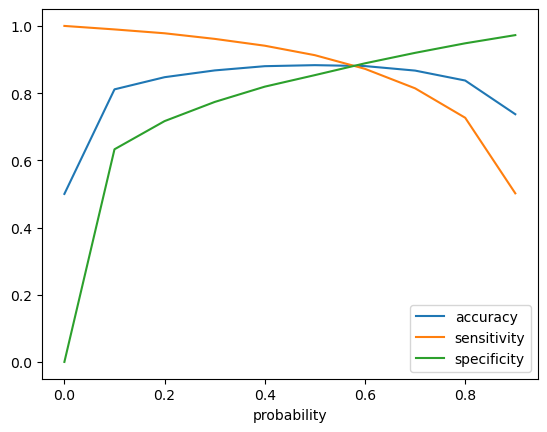

In [217]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

In [218]:
##### Observation

#Accuracy - Becomes stable around 0.6

#Sensitivity - Decreases with the increased probablity.

#Specificity - Increases with the increasing probablity.

#At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

#Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, which is our main goal.

In [219]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.040357e-03,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.747687e-01,1,1,1,0,0,0,0,0,0,0,0,0
2,0,1.074416e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,1.623696e-04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,4.439789e-14,4,1,0,0,0,0,0,0,0,0,0,0


#### Metrics

In [220]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[18288  3137]
 [ 1866 19559]]


In [221]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [222]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8832438739789965
Sensitivity:- 0.9129054842473746
Specificity:- 0.8535822637106184


### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [223]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

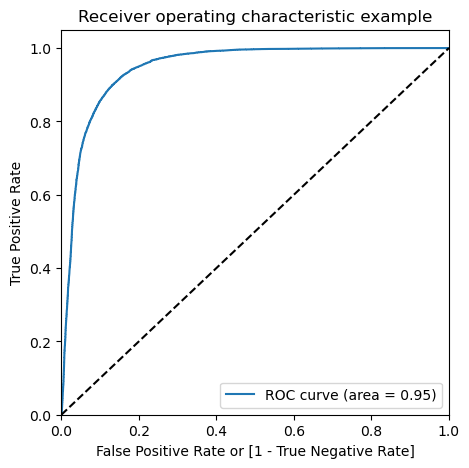

In [224]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [225]:
# This is a Gini model as the area of the ROC curve is closer to 1

### Testing the model on the test set

In [226]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [227]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [228]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

#### Predictions on the test set with final model

In [229]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [230]:
y_test_pred.head()

5704     0.002688
64892    0.000098
39613    0.000857
93118    0.113157
81235    0.020956
dtype: float64

In [231]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.002688
64892,0.000098
39613,0.000857
93118,0.113157
81235,0.020956


In [232]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [233]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [234]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [235]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [236]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.002688
1,0,64892,0.000098
2,0,39613,0.000857
3,0,93118,0.113157
4,0,81235,0.020956


In [237]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [238]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [239]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.002688
1,64892,0,0.000098
2,39613,0,0.000857
3,93118,0,0.113157
4,81235,0,0.020956


In [240]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [241]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.002688,0
1,64892,0,0.000098,0
2,39613,0,0.000857,0
3,93118,0,0.113157,0
4,81235,0,0.020956,0


#### Metrics

In [242]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4534  814]
 [  44  149]]


In [243]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [244]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8451543042772063
Sensitivity:- 0.772020725388601
Specificity:- 0.8477935676888556


#### Summary of the model

In [245]:
#Train set
        #Accuracy = 0.84
        #Sensitivity = 0.81
        #Specificity = 0.83
#Test set
        #Accuracy = 0.78
        #Sensitivity = 0.82
        #Specificity = 0.78


#### Model is performing well in the test set, what it had learnt from the train set.

#### Business recomendation - Top predictors

##### Variables 	Coefficients
##### loc_ic_mou_8 	-3.3287
##### og_others_7 	-2.4711
##### ic_others_8 	-1.5131
##### isd_og_mou_8 	-1.3811
##### decrease_vbc_action 	-1.3293
##### monthly_3g_8 	-1.0943
##### std_ic_t2f_mou_8 	-0.9503
##### monthly_2g_8 	-0.9279
##### loc_ic_t2f_mou_8 	-0.7102
##### roam_og_mou_8 	0.7135

##### Below are few top variables selected in the logistic regression model.

In [246]:
#We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

#E.g.:-

#If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn

## Recomendation -

In [247]:
# During the action phase (as seen above in the month of August) keep are track of customers whoes ISD, MOU, local calls are turned to be lesser.
# 3G recharge if higher during any month those customers seems to churn.
# Cutomers decreasing monthly 2g usage for August are most probable to churn.
# Also, the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.